In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory, image
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
train_dir =  '/content/drive/MyDrive/Colab_Notebooks/RawData/Training/'
validation_dir =  '/content/drive/MyDrive/Colab_Notebooks/RawData/Validation/'

In [3]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 5

train_dataset = image_dataset_from_directory(train_dir,
                                             shuffle=True,
                                             image_size =IMG_SIZE,
                                             batch_size=BATCH_SIZE)

Found 70 files belonging to 2 classes.


In [4]:
validation_dataset = image_dataset_from_directory(validation_dir,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  image_size=IMG_SIZE)

Found 30 files belonging to 2 classes.


In [5]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

In [6]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [7]:
base_model.trainable = False


In [8]:
base_model.summary()


Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [9]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input


In [10]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(units=1,activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)

In [11]:
base_learning_rate = 0.01
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [12]:
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 224, 224, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 224, 224, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0     

In [13]:
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=5
                    )

Epoch 1/5
14/14 [==============================] - 11s 437ms/step - loss: 0.6713 - accuracy: 0.6714 - val_loss: 0.1668 - val_accuracy: 0.9333
Epoch 2/5
14/14 [==============================] - 7s 374ms/step - loss: 0.0487 - accuracy: 0.9714 - val_loss: 0.0416 - val_accuracy: 1.0000
Epoch 3/5
14/14 [==============================] - 7s 376ms/step - loss: 0.0176 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 4/5
14/14 [==============================] - 7s 382ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 5/5
14/14 [==============================] - 7s 374ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000


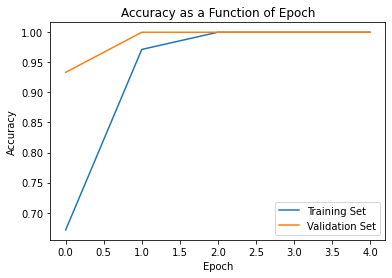

In [14]:
plt.plot(history.history['accuracy'],label='Training Set')
plt.plot(history.history['val_accuracy'],label='Validation Set')
plt.title('Accuracy as a Function of Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('accuracy.png',bbox_inches='tight',dpi=400)

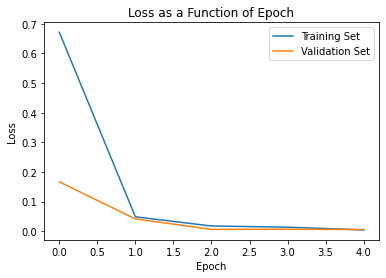

In [15]:
plt.plot(history.history['loss'],label='Training Set')
plt.plot(history.history['val_loss'],label='Validation Set')
plt.title('Loss as a Function of Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('loss.png',bbox_inches='tight',dpi=400)

In [16]:
for images, labels in validation_dataset.take(5):
  print('Labels: ',labels)
  print('Predictions: ',((model.predict(images) > 0.5) + 0).ravel())
  

Labels:  tf.Tensor([1 1 0 0 0], shape=(5,), dtype=int32)
Predictions:  [1 1 0 0 0]
Labels:  tf.Tensor([1 0 0 1 0], shape=(5,), dtype=int32)
Predictions:  [1 0 0 1 0]
Labels:  tf.Tensor([1 1 0 0 0], shape=(5,), dtype=int32)
Predictions:  [1 1 0 0 0]
Labels:  tf.Tensor([1 0 1 1 0], shape=(5,), dtype=int32)
Predictions:  [1 0 1 1 0]
Labels:  tf.Tensor([1 0 0 1 1], shape=(5,), dtype=int32)
Predictions:  [1 0 0 1 1]
